# 1. Configuration de l'environnement


## - Installation des bibliothèques nécessaires

In [1]:
# Cette commande installe deux bibliothèques que nous allons utiliser dans ce projet.

!pip install matplotlib pandas 

# Pandas nous aide à manipuler et gérer les DataFrames de manière efficace.
# Matplotlib est utilisé pour afficher les visualisations de nos données.


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


## - Importation des packages dans notre environnement

In [2]:
# Après avoir installé les packages nécessaires, importons-les dans notre environnement.

import pandas as pd 
import matplotlib.pyplot as plt

# pd et plt sont des alias des bibliothèques pour une utilisation plus facile.

# 2. CHARGEMENT ET EXPLORATION DU JEU DE DONNÉES



## - Chargement du jeu de données dans un DataFrame Pandas

In [3]:
# Chargement de notre dataset CSV dans un DataFrame pandas.

df = pd.read_csv('/Users/yassine/Desktop/youcode project/sell4all.csv')

df

,Pays,Age,Genre,Dépenses des clients
0,France,32,Female,150.50
1,Germany,45,Male,200.75
2,Spain,28,Female,75.25
3,Italy,39,Male,180.00
4,UK,52,Female,250.30
...,...,...,...,...
60,Digital Realm,NaN,AI,1010101.01
61,Multiverse,∞,Non-Binary,π
62,Error,#VALUE!,404,#DIV/0!
63,"Greece, Italy",25;30,Male;Female,100+200


## - Initial data exploration : 

In [4]:
## La méthode head de pandas nous montre les informations sur les premières et dernières lignes

df.head # Cette méthode est utilisée pour s'assurer que les données ont été chargées correctement.

<bound method NDFrame.head of                  Pays           Age         Genre Dépenses des clients
0              France             32       Female               150.50
1             Germany             45         Male               200.75
2               Spain             28       Female                75.25
3               Italy             39         Male               180.00
4                  UK             52       Female               250.30
..                ...            ...          ...                  ...
60      Digital Realm            NaN           AI           1010101.01
61         Multiverse              ∞   Non-Binary                    π
62              Error        #VALUE!          404              #DIV/0!
63      Greece, Italy          25;30  Male;Female              100+200
64   United  Kingdom   Not Available        Other            Priceless

[65 rows x 4 columns]>

# 3. COMPRÉHENSION DE NOTRE JEU DE DONNÉES

In [5]:
# La méthode describe nous donne un résumé statistique de chaque colonne.

df.describe(include="all") # La méthode describe nous donne un résumé statistique de chaque colonne.

,Pays,Age,Genre,Dépenses des clients
count,65,63,64,64
unique,20,41,12,60
top,France,28,Female,195.25
freq,10,3,27,2


Comme on le voit dans la sortie, la méthode describe traite toutes les colonnes comme des objets, ce qui signifie que nous n'obtenons pas de résumé statistique pour les colonnes numériques.


In [6]:
# La méthode info de pandas fournit des informations techniques sur les données, telles que les types de données, l'utilisation de la mémoire et les valeurs manquantes.
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Pays                  65 non-null     object
 1    Age                  63 non-null     object
 2   Genre                 64 non-null     object
 3   Dépenses des clients  64 non-null     object
dtypes: object(4)
memory usage: 2.2+ KB


### Analyse des Données

- **Colonnes avec des valeurs manquantes** :
  - Les colonnes `Âge`, `Genre`, et `Dépenses des clients` contiennent des valeurs manquantes. Cela pourrait nécessiter un nettoyage des données pour assurer une analyse plus précise.

- **Types de données uniformes** :
  - Toutes les colonnes sont au format `object`, ce qui indique que les données pourraient être sous forme de texte ou que les données numériques sont mal formatées. Il peut être nécessaire de convertir certains champs en types de données appropriés pour une meilleure analyse.

- **Consommation de mémoire** :
  - Le DataFrame utilise une quantité relativement faible de mémoire (2,2 Ko), ce qui indique qu'il est assez léger en termes de taille des données.

- **Potentiel de conversion de type** :
  - Les colonnes telles que `Âge` et `Dépenses des clients` pourraient être mieux analysées si elles étaient converties en types numériques pour permettre des calculs statistiques plus précis.

- **Uniformité des données** :
  - La présence de colonnes avec des valeurs non nulles mais inférieures au total des lignes (63 pour `Âge`, 64 pour `Genre`, et `Dépenses des clients`) suggère qu'un nettoyage et une vérification supplémentaires sont nécessaires pour garantir la qualité des données.


# 4. Nettoyage des données (préliminaire)

Lors de ce nettoyage préliminaire des données, nous nous concentrerons sur la conversion des colonnes `Âge` et `Dépenses des clients` en types numériques. Cette étape est cruciale pour pouvoir effectuer des calculs statistiques tels que la moyenne et la médiane. Nous veillerons également à éliminer les entrées incorrectes ou aberrantes afin de garantir la précision des résultats.


In [8]:
# Conversion des colonnes "Âge" et "Dépenses des clients" en type numérique, si elles ne le sont pas déjà

df[' Age '] = pd.to_numeric(df[' Age '], errors='coerce')
df['Dépenses des clients'] = pd.to_numeric(df['Dépenses des clients'], errors='coerce')
df[' Age '] = pd.to_numeric(df[' Age '], errors='coerce')
df['Dépenses des clients'] = pd.to_numeric(df['Dépenses des clients'], errors='coerce')

# Traiter les valeurs non numériques qui ont pu être converties en NaN
# Pour l'instant, supprimons toutes les lignes où 'Âge' ou 'Dépenses des clients' sont NaN
df = df.dropna(subset=[' Age ', 'Dépenses des clients'])



### Remarques supplémentaires :

- La méthode `pd.to_numeric` avec l'option `errors='coerce'` convertit les valeurs non numériques en `NaN`, ce qui facilite l'identification des entrées incorrectes.

- En supprimant les lignes contenant des `NaN`, nous nettoyons les données pour garantir que les calculs de moyenne et de médiane sont effectués uniquement sur des valeurs valides.

- Cette approche aide à éviter les erreurs de calcul et améliore la qualité des analyses statistiques ultérieures.


# 5. Statistiques récapitulatives

In [10]:
# Afficher les statistiques résumées du dataset
print(df.describe())

# Calculer la moyenne et la médiane pour 'Âge' et 'Dépenses des clients'
mean_age = df[' Age '].mean()
median_age = df[' Age '].median()

mean_spending = df['Dépenses des clients'].mean()
median_spending = df['Dépenses des clients'].median()

print(f"Âge moyen : {mean_age}, Âge médian : {median_age}")
print(f"Dépenses moyennes : {mean_spending}, Dépenses médianes : {median_spending}")

# Remarques supplémentaires :
# - La méthode describe() fournit un aperçu statistique complet des colonnes numériques, incluant les mesures comme la moyenne, la médiane, l'écart type, etc.
# - Le calcul de la moyenne et de la médiane permet de comprendre les tendances centrales des données pour 'Âge' et 'Dépenses des clients'.
# - La moyenne est utile pour connaître la tendance générale, tandis que la médiane donne une meilleure idée de la valeur centrale en cas de valeurs extrêmes ou de distribution asymétrique.


              Age   Dépenses des clients
count    56.000000             56.000000
mean     54.232143          18014.616964
std     131.186057         133609.213676
min    -100.000000              0.010000
25%      29.750000            117.625000
50%      36.500000            167.500000
75%      46.250000            201.937500
max    1000.000000         999999.990000
Âge moyen : 54.232142857142854, Âge médian : 36.5
Dépenses moyennes : 18014.616964285717, Dépenses médianes : 167.5


### Résumé de l'analyse des données

#### Âge
- **Âge moyen** : 54,23
- **Médiane de l'âge** : 36,5
  - La différence significative entre la moyenne et la médiane indique des valeurs d'âge très élevées qui influencent la moyenne.
- **Écart type** : 131,19, indiquant une grande variabilité dans les âges.
- **Valeurs extrêmes** :
  - Minimum : -100 (probable erreur ou outlier)
  - Maximum : 1000 (probable outlier)

#### Dépenses des clients
- **Dépense moyenne** : 18 014,62
- **Médiane des dépenses** : 167,50
  - La grande différence entre la moyenne et la médiane suggère la présence de dépenses exceptionnellement élevées qui augmentent la moyenne.
- **Écart type** : 133 609,21, montrant une grande variabilité dans les dépenses.
- **Valeurs extrêmes** :
  - Minimum : 0,01 (valeur très basse)
  - Maximum : 999 999,99 (probable outlier)

#### Observation Générale
- Les données présentent une asymétrie notable et des valeurs extrêmes. Un nettoyage des données est nécessaire pour améliorer la précision des analyses futures.


In [11]:
# Étape 1 : Calculer Q1 (25e percentile) et Q3 (75e percentile)
Q1 = df['Dépenses des clients'].quantile(0.25)
Q3 = df['Dépenses des clients'].quantile(0.75)

# Étape 2 : Calculer l'Intervalle Interquartile (IQR)
IQR = Q3 - Q1

# Étape 3 : Définir les limites inférieure et supérieure
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Étape 4 : Filtrer les outliers
df = df[(df['Dépenses des clients'] >= lower_bound) & (df['Dépenses des clients'] <= upper_bound)]

In [12]:
# Application de la même logique à la colonne Âge
Q1 = df[' Age '].quantile(0.25)
Q3 = df[' Age '].quantile(0.75)

# Étape 2 : Calculer l'Intervalle Interquartile (IQR)
IQR = Q3 - Q1

# Étape 3 : Définir les limites inférieure et supérieure
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Étape 4 : Filtrer les outliers
df = df[(df[' Age '] >= lower_bound) & (df[' Age '] <= upper_bound)]

In [13]:
df.describe(include='all')

,Pays,Age,Genre,Dépenses des clients
count,53,53.000000,52,53.000000
unique,9,NaN,2,NaN
top,Germany,NaN,Female,NaN
freq,10,NaN,27,NaN
mean,NaN,37.490566,NaN,156.953774
std,NaN,9.037577,NaN,54.241707
min,NaN,22.000000,NaN,5.750000
25%,NaN,30.000000,NaN,120.000000
50%,NaN,36.000000,NaN,165.000000
75%,NaN,45.000000,NaN,200.250000


#### Observation Générale
- La suppression des outliers a permis d'obtenir une distribution plus équilibrée pour les âges et les dépenses.
- Les statistiques centrales (moyenne et médiane) sont maintenant plus proches, reflétant une répartition des données plus uniforme.
- La variabilité des données est réduite, mais certaines valeurs extrêmes restent présentes, nécessitant une attention continue.

# 6. Nettoyage des données approfondi

In [14]:
# Supprimer les lignes dupliquées
df = df.drop_duplicates()

# Filtrer les lignes où les dépenses des clients sont inférieures à 10 €
df = df[df['Dépenses des clients'] >= 10]


In [15]:
# Suppression des espaces indésirables dans le nom de la colonne "Âge"
df = df.rename(columns={' Age ': 'age'})

In [ ]:
df.describe(include='all')

In [16]:
# Il reste encore une valeur manquante dans la colonne Genre.

# Étant donné que notre jeu de données est petit et que nous ne nous concentrons pas sur le genre des clients, 
# et que la suppression de colonnes supplémentaires affecterait notre jeu de données, 
# nous allons remplacer la valeur manquante par la valeur la plus fréquente (mode).

df['Genre'] = df['Genre'].fillna(df['Genre'].mode()[0])

In [17]:
df.isnull().sum()

Pays                    0
age                     0
Genre                   0
Dépenses des clients    0
dtype: int64

Comme nous pouvons le voir, les données ne contiennent plus de valeurs manquantes.

# 7. Prétraitement supplémentaire

In [18]:
# Sélectionner les colonnes pertinentes : 'Pays', 'Âge', 'Genre', 'Dépenses des clients'
df = df[['Pays', 'age', 'Genre', 'Dépenses des clients']]

# 8. Visualisation des données

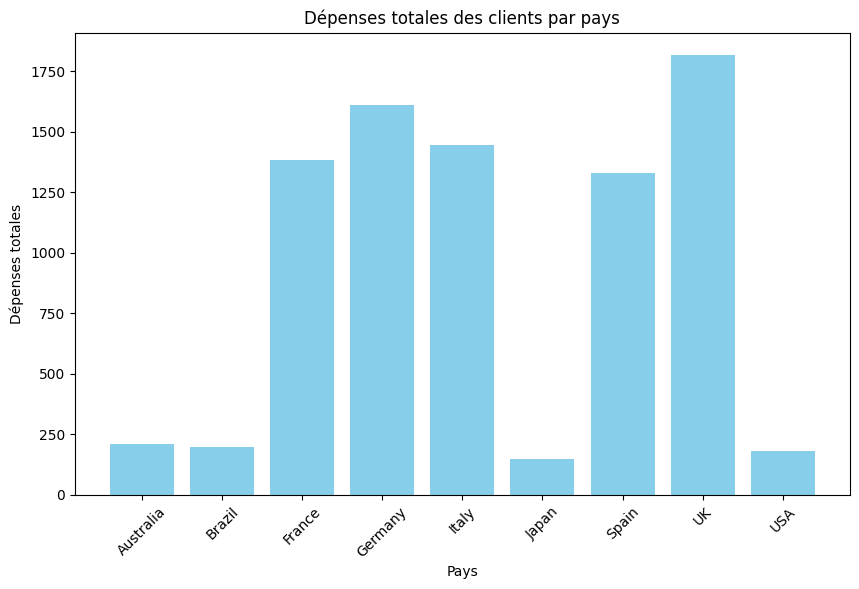

In [19]:

# Regrouper par 'Pays' et sommer les 'Dépenses des clients'
spending_by_country = df.groupby('Pays')['Dépenses des clients'].sum()

# Créer le graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(spending_by_country.index, spending_by_country.values, color='skyblue')

# Ajouter le titre et les labels
plt.title('Dépenses totales des clients par pays')
plt.xlabel('Pays')
plt.ylabel('Dépenses totales')

# Faire pivoter les labels de l'axe x pour une meilleure lisibilité s'il y a beaucoup de pays
plt.xticks(rotation=45)

# Afficher le graphique
plt.show()


- **Comme nous pouvons le voir, la majorité des dépensiers sur le site Sell4All sont européens.**

- **Le Royaume-Uni, l'Allemagne, la France, l'Italie et l'Espagne sont les plus gros dépensiers, avec un total de dépenses compris entre 1300 $ et  1900 $.**

- **L'Australie, le Brésil, le Japon et les États-Unis ont une dépense moyenne d'environ 200 $.**


# 9. Enregistrement des données nettoyées

In [20]:
output_file_path = '/Users/yassine/Desktop/youcode project/sell4all_cleaned.csv'
df.to_csv(output_file_path, index=False)